# Scikit learn

Recuerden que tiene una muy buena [documentación](https://scikit-learn.org/stable/user_guide.html).

Vimos que en general, los objetos de sklearn tienen los métodos:

- fit
- transform o predict

Vamos a trabajar con un dataset sacado de una competencia de data science para aprender a utilizar skitlearn.

Montamos drive 

In [2]:
#from google.colab import drive # La usamos para montar nuestra unidad de Google Drive
#drive.mount('/content/drive') # Montamos nuestra unidad de Google Drive

Vamos a trabajar con un dataset que contiene datos sobre la actividad de los usuarios que visitan un sitio web de ecommerce.

Las columnas del dataset son:

- id: Id del usuario 
- administrative: Número de veces que el usuario visito la sección "administrative"
- administrative_duration: Tiempo que el usuario paso en la sección administrative
- informational: Número de veces que el usuario visitó la sección "informational"
- informational_duration: Tiempo que el usuario paso en la sección informational
- productrelated: Número de veces que el usuario visitó la sección "products related"
- productrelated_duration: Tiempo que el usuario pasó en la sección 
- bouncerates: Porcentaje de visitantes que entran a la página e inmediatamente la dejan sin interactuar con la misma. Esta metrica solo se tiene en cuenta si es la primer página que se visitó del sitio web.
- exitrates: De la cantidad total de visitas a las páginas del sitio web, el porcentaje de usuarios que lo abandonaron en esta página. Esto es, el  porcentaje de usuarios que su última visita al sitio fué en esta página.
- pagevalues: Este es el valor promedio del sitio web, indica la contribución que este sitio web hizo al visitante que llega a la página o sección de compra final. Más detalles sobre pageValues: https://support.google.com/analytics/answer/2695658?hl=en
-  specialday: Es una fecha especial o no (1 o 0)
- operatingsystems: Sistema operativo
- browser: Nombre del navegador
- region: Region geográfica del usuario
- traffictype: Tipo de tráfico web
- visitortype: Nuevo o uno que retorno al sitio
- Weekend: 1 si es fin de semana y 0 en otro caso
- revenue: 1 si el usuario hizo una compra y 0 en otro caso

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Leemos el csv:

In [4]:
df = pd.read_csv('online-shoppers-intention.csv')

In [5]:
df.sample(5)

,id,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,revenue
7159,7160.0,2.0,58.000000,0.0,NaN,7.0,101.800000,0.000000,NaN,0.000000,0.0,Mar,NaN,2.0,8.0,2.0,New_Visitor,0.0,0.0
552,553.0,3.0,54.500000,0.0,0.0,6.0,148.750000,0.022222,0.033333,0.000000,0.0,Nov,NaN,2.0,1.0,3.0,Returning_Visitor,0.0,0.0
4674,4675.0,0.0,0.000000,1.0,NaN,2.0,0.000000,0.200000,0.200000,0.000000,0.0,Nov,NaN,1.0,1.0,15.0,Returning_Visitor,0.0,0.0
3826,3827.0,7.0,271.333333,0.0,NaN,54.0,3510.416667,NaN,0.010714,9.865125,0.0,May,NaN,2.0,4.0,6.0,Returning_Visitor,0.0,1.0
4418,4419.0,0.0,0.000000,1.0,242.8,73.0,1860.950000,0.005405,0.019527,0.000000,0.0,June,NaN,2.0,1.0,2.0,Returning_Visitor,0.0,0.0


¿ Cuántas filas y columnas tiene el dataset ?

In [6]:
# COMPLETAR
n_filas = df.shape[0]
n_columnas = df.shape[1]
print(f"num de filas: {n_filas}")
print(f"num de columnas: {n_columnas}")

num de filas: 8631
num de columnas: 19


## Valores nulos

¿ Hay valores nulos en el dataset ?

¿ Cuántos por cada columna ?

In [7]:
df.isna().sum()

id                            0
Administrative             1295
Administrative_Duration       0
Informational                 0
Informational_Duration     2589
ProductRelated                0
ProductRelated_Duration       0
BounceRates                 863
ExitRates                   432
PageValues                    0
SpecialDay                    0
Month                         0
OperatingSystems           6905
Browser                       0
Region                       86
TrafficType                   0
VisitorType                 259
Weekend                       0
revenue                       0
dtype: int64

En porcentajes:

In [8]:
round(df.isnull().mean() * 100, 2)

id                          0.00
Administrative             15.00
Administrative_Duration     0.00
Informational               0.00
Informational_Duration     30.00
ProductRelated              0.00
ProductRelated_Duration     0.00
BounceRates                10.00
ExitRates                   5.01
PageValues                  0.00
SpecialDay                  0.00
Month                       0.00
OperatingSystems           80.00
Browser                     0.00
Region                      1.00
TrafficType                 0.00
VisitorType                 3.00
Weekend                     0.00
revenue                     0.00
dtype: float64

Tenemos valores nulos en varias columnas. En algunas el porcentaje es muy alto (80% en operating systems) y en otras muy bajo (1% en region).

A simple vista:

1) ¿Descartarían alguna columna por completo?

2) ¿Descartarían las filas con nulos en alguna de las columnas?

3) ¿En qué casos creen que conviene utilizar imputación univariante y en cuáles multivariante ?

Vamos a analizar el dataset y buscar una respuesta a estas preguntas.

### Columna administrative

Sabemos que la columna **administrative** que tiene 15% de valores nulos nos dice:

*Número de veces que el usuario visito la sección "administrative"*

Pero la columna **administrative_duration** está relacionada a la misma: <span style='color:peru'>  
(Ya que si un usuario tiene administrative_duration $\neq 0$ es porque ingresó, no se cuantas veces, pero ingresó.)</span>: 

*Tiempo que el usuario paso en la sección administrative*

tiene 0 nulos.

En este caso, al comprender el problema, podemos suponer que cuando  administrative duration tiene un valor > 0, la variable administrative debería ser almenos 1.

Antes de utilizar esta condición para completar nulos en la columna, vamos a verificar que se cumpla la condición.  
  
<span style='color:peru'>Es decir se debe comprobar que lo siguiente:</span>  
  
<span style='color:peru'>1) Si administrative_duration = 0 entonces administrative=0</span>  
<span style='color:peru'>2) Si administrative_duration > 0 entonces administrative $\neq$ 0</span>  
  
<span style='color:peru'>si se cumplen entonces se puede sustituir los NaNs de administrative del siguiente modo: (sería lo lógico lo esperable)</span>  
   
<span style='color:peru'>1) Si administrative_duration = 0 entonces el NaN de administrative se reemplaza por 0</span>  
<span style='color:peru'>2) Si administrative_duration > 0 entonces el NaN de administrative se reemplaza por 1 (ya que al menos visitó una vez el sitio de administración) </span>


¿ Existen casos en que Administrative_Duration sea mayor a 0 y Administrative igual a 0 ?


<span style='color:peru'>Condicion 2</span>

In [9]:
df[(df.Administrative_Duration > 0) & (df.Administrative == 0)].shape[0]

0

Vemos que no hay casos, por lo tanto podemos asumir que cuando Administrative_Duration es > 0 entonces Administrative es $\color{peru}{\neq 0.}$

Ahora.. 
¿ Qué pasa si Administrative_Duration es = 0 ? 

¿ Hay casos en que Administrative_Duration sea = 0 y Administrative = 1 ?  
  
Deberia decir:  
  
<span style='color:peru'>Condicion 1:</span>  
  
<span style='color:peru'> ¿ Hay casos en que Administrative_Duration sea = 0 y Administrative $\color{peru}{\neq 0}$ ? </span>  
  
<span style='color:peru'>(Además para contar bien, no hay que contar los NaNs, para eso sumamos la condicion df.Administrative.notna())</span>

In [10]:
df[(df.Administrative_Duration == 0) & ((df.Administrative!=0) & (df.Administrative.notna()))].shape[0]

81

<span style='color:peru'>Entonces hay 81 casos en los que se visito la pagina pero no se registró el tiempo que permaneció. Esto puede ser interpretado como que el tiempo fue tan poco que no se registró. También al haber tan pocos casos se considerará que en general la condición se cumple.</span>

Tenemos 78 casos. No parecen ser muchos.<span style='color:peru'> 81 casos</span>

In [11]:
# Mask
adm_dur0 = df.Administrative_Duration == 0
adm_durM0 = df.Administrative_Duration > 0

Utilizamos las mascaras combinadas con el método .fillna() de pandas.

In [12]:
# Primero se reemplazan los NaNs de Administrative en donde Administrative_Duration = 0, por 0

df.loc[adm_dur0, 'Administrative'] = df.loc[adm_dur0, 'Administrative'].fillna(0) # Cuando la duracion es 0

# Segundo se reemplazan los NaNs de Administrative en donde Administrative_Duration >0, por 1

df.loc[adm_durM0, 'Administrative'] = df.loc[adm_durM0, 'Administrative'].fillna(1) # Cuando la duracion es > 0

In [13]:
df.Administrative.isnull().sum()

0

Ahora la columna administrative no tiene más nulos. Los imputamos teniendo en cuenta el valor de otra columna (y entendiendo el problema)

### Informational duration

En esta columna tenemos un 30% de valores nulos.

En la columna informational, no hay nulos. Esta columna nos puede llegar a servir para encontrar alguna condición como en el caso anterior. Sin embargo, a diferencia del caso anterior donde teniamos una variable "booleana", la columna informational duration es continua. 

En estos casos podemos utilizar estrategias como:
- Completar con el valor más frecuente en la columna
- Completar con la media de la columna
- Completar con la mediana de la columna
- Completar con un valor definido por nosotros

Para esto vamos a utilizar el SimpleImputer de scikit learn. Funciona de una manera muy similar a .fillna() de pandas.

Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer

Algo que debemos tener en cuenta, es que cuando la variable informational es = 0, la variable informational duration debería tambien ser 0. (similar al caso anterior).

Podemos completar los nulos de la misma forma que el caso anterior cuando se cumpla esta condición. En el resto de los casos (cuando informational sea $\color{peru}{\neq0}$ ( aca también informational NO ES booleano asi que NO va 1 ), utilizaremos el SimpleImputer de scikitlearn.  
  
<span style='color:peru'>Aca también ninguna variable es booleana:</span>  
<span style='color:peru'>- informational: Número de veces que el usuario visitó la sección "informational"</span>  
<span style='color:peru'>- informational_duration: Tiempo que el usuario paso en la sección "informational"</span>  
  
<span style='color:peru'>Es el mismo caso que el anterior, solo que al reves, es decir, se tiene el ingreso pero no el tiempo (variable continua (float) no discreta o entera como en el caso anterior)  
  
<span style='color:peru'>Entonces los casos que se deberían ver serían:</span>   
<span style='color:peru'>1) Si Informational = 0 entonces Informational_Duration = 0</span>  
<span style='color:peru'>2) Si Infromational 
$\neq 0$ entonces Informational_Duration = media, mediana o algún otro estimador que se considere apropiado Y QUE SURJA de los valores de Informational_Duration CUANDO Informational $\neq 0$.</span>


In [14]:
# Mask
informational_0 = df.Informational == 0
informational_1 = df.Informational != 0

In [15]:
#Condición 1
info0ydur=(df.Informational==0) & ((df.Informational_Duration!=0) & (df.Informational_Duration.notna()))
df[info0ydur].shape[0]

0

<span style='color:peru'>No hay casos en los que si Informational = 0 Informational_Duration sea distinto a cero.</span>  
<span style='color:peru'>Por lo tanto SIEMPRE que Informational = 0 Informational_Duration será a cero.</span>  
<span style='color:peru'>Entonces se reemplazan los NaNs de Informational_Duration por 0 cuando Informational sea 0</span>


In [16]:
df.loc[informational_0, 'Informational_Duration'].isna().sum()

2038

<span style='color:peru'> Son 2038 a reemplazar</span>

In [17]:
# Cuando la columna informational es 0, le asignamos una duración 0 a los NaNs de Informational_Duration
df.loc[informational_0, 'Informational_Duration'] = df.loc[informational_0, 'Informational_Duration'].fillna(0) 

<span style='color:peru'>¿Cuantos NaNs quedan?</span>

In [18]:
df['Informational_Duration'].isna().sum()

551

<span style='color:peru'>Estos 551 son los NaNs que se dan en Informational_Duration cuando Informational es $\neq 0$ </span>  
<span style='color:peru'>Y que se deberan reemplazar con imputer eligiendo algún criterio. </span>


<span style='color:peru'>Ahora ¿Cuantos de los 551 NaNs se dan cuando Informational=1 y cuantos cuando Informational>1?</span>

In [19]:
df[df['Informational']==1]['Informational_Duration'].isna().sum()

217

In [20]:
df[df['Informational']>1]['Informational_Duration'].isna().sum()


334

<span style='color:peru'>Mas abajo se propone reemplazar los NaNs con la mediana de los 217 casos cuando Informational=1, lo cual no parece razonable ya que se deberian usar todos. O sino usar por tramos si el NaN de Informational_Duration es de informational = 1 entonces usar la mediana de los casos donde Informational=1 y en los demas usar la mediana de Informational >1. Yo decidi simplemente usar todos los casos ya que es un ejercicio. Lo que si no creo conveniente es usar los de Informational=1 solamente.</span>


Quedan solo 551 valores nulos en la columna.

Ahora, ¿Cómo utilizamos el SimpleImputer en el resto de los casos?

Si vemos la documentación, la clase SimpleImputer tiene los parámetros:

- missing_values
- strategy
- fill_value
- verbose
- copy
- add_indicator

Antes de arrancar a utilizarlo, leamos la documentación y entendamos para que sirve cada uno de estos parámetros, que tipo de datos podemos pasarle y distingamos cuáles son obligatorios y cuáles no.


Una vez que entendimos esto, creamos nuestro objeto SimpleImputer. Para esto primero que nada, debemos importarlo:

In [21]:
from sklearn.impute import SimpleImputer

Como vimos en sklearn se suelen seguir 3 pasos: crear el objeto, fit y transform.

Paso 1: Creamos el objeto.

Un parametro que tenemos que pasar, es la estrategia. Debemos decidir cual utilizar. Veamos la distribución de la variable en los casos en que informational es $\color{peru}{\neq 0}$ (no va = 1, y voy a a usar los 551 casos)

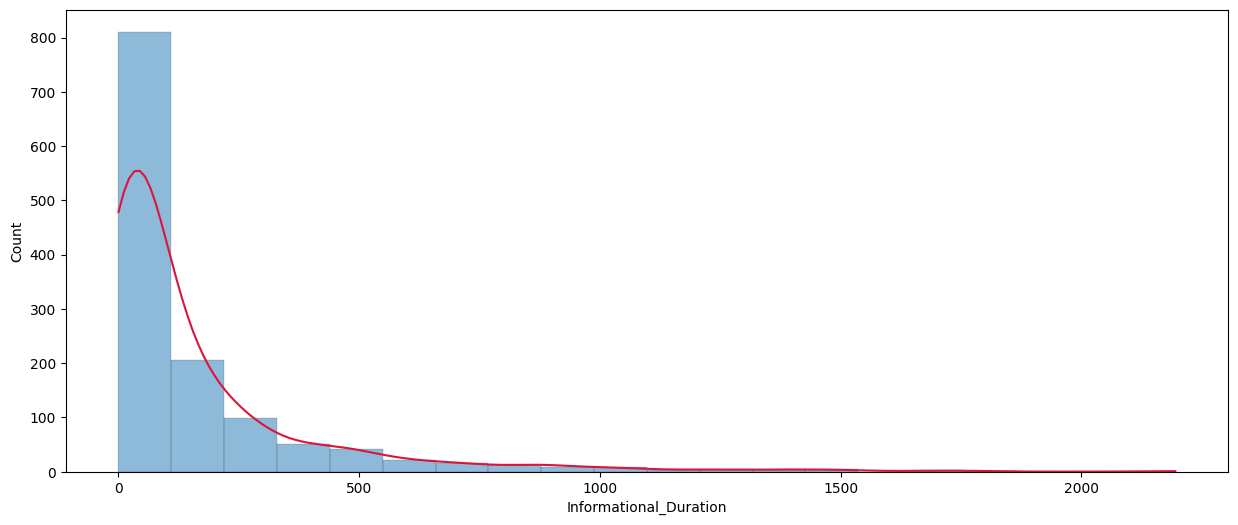

In [22]:
infoDN0=df.Informational != 0
# info1=df.Informational != 0
# fig = plt.figure(figsize=(8,4))
# sns.distplot(df[informational_1].Informational_Duration)
# plt.title("Distribución de la variable informational duration cuando Informational = 1")
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.histplot(df[infoDN0].Informational_Duration, bins=20, kde=True, linewidth=0.1)
ax.lines[0].set_color("crimson")
plt.show()

In [23]:
df[infoDN0].Informational_Duration.mean()

159.10543894769143

In [24]:
df[infoDN0].Informational_Duration.median()

63.5

Cuando tenemos una distribución "normal" utilizar la media o mediana para completar nulos no nos va a cambiar mucho.

En distribuciones con una cola larga como esta que vemos, suele ser mejor utilizar la mediana ya que la media esta sesgada por los valores extremos.

Por lo tanto, vamos a utilizar la mediana.

In [25]:
# Aca se "instancia" un "objeto" llamdo "my_simple_imputer" de la clase "SimpleImputer"
my_simple_imputer = SimpleImputer(strategy='median') 
# Este imputer considera nulos a los np.nan y utiliza la mediana para rellenar

Paso 2:


In [26]:
# Aca se "ajusta o entrena" (fit) con los valores de Informational_Duration tal que Informational!=0
my_simple_imputer.fit(df.loc[infoDN0,['Informational_Duration']])

SimpleImputer(strategy='median')

In [27]:
# Comprobamos que el estimador que usará para los reemplazos sea la mediana = 63.5.
my_simple_imputer.statistics_

array([63.5])

Paso 3:


In [28]:
# Aca asigna la mediana a los valores de Informational_Duration tal que Informational!=0
df.loc[infoDN0,['Informational_Duration']] = my_simple_imputer.transform(df.loc[infoDN0,['Informational_Duration']])

In [29]:
df.Informational_Duration.isna().sum()

0

Ahora ya completamos todos los nulos en esta columna también, pero quedan varias más.


# Ejercicio

1) Investigar fit_transform e implementarlo en el caso anterior (Informational_Duration).

2) Con lo que vimos hasta ahora, analizar las variables y decidir estrategias para completar nulos / descartar filas o columnas en cada caso.

Al finalizar, no debe haber ninguna fila con valores nulos.

In [30]:
df.isna().sum()

id                            0
Administrative                0
Administrative_Duration       0
Informational                 0
Informational_Duration        0
ProductRelated                0
ProductRelated_Duration       0
BounceRates                 863
ExitRates                   432
PageValues                    0
SpecialDay                    0
Month                         0
OperatingSystems           6905
Browser                       0
Region                       86
TrafficType                   0
VisitorType                 259
Weekend                       0
revenue                       0
dtype: int64

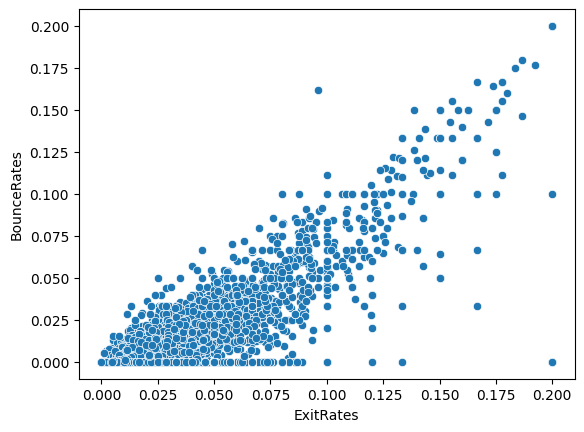

In [31]:
sns.scatterplot(x=df['ExitRates'], y=df['BounceRates'])
plt.show()

Parece haber una correlacion lineal o casi lineal de todas formas se adopta la funcion:(porque parece tiene una leve concavidad hacia arriba)
$$br=f(ex)=(a \cdot ex+b)^2+c$$
en donde:  
$br=BounceRates$  
$ex=ExitRates$

Pero primero se eliminan los registros en donde ***BounceRates=0*** y a la vez ***ExitRates=0***. Son tan pocos que se decide eliminarlos y de todos modos no pueden estimado con ninguna de los otros campos ya que no existe ningun tipo de correlación.(hacer un pairplot)

In [32]:
br_ex=df['BounceRates'].isna() & df['ExitRates'].isna()
df[br_ex].shape[0]

40

In [33]:
df = df.loc[~br_ex]
df.isna().sum()

id                            0
Administrative                0
Administrative_Duration       0
Informational                 0
Informational_Duration        0
ProductRelated                0
ProductRelated_Duration       0
BounceRates                 823
ExitRates                   392
PageValues                    0
SpecialDay                    0
Month                         0
OperatingSystems           6877
Browser                       0
Region                       86
TrafficType                   0
VisitorType                 257
Weekend                       0
revenue                       0
dtype: int64

Entonces quedan 823 NaNs en br y 392 en ex. La idea es completar los br con una relación con ex y ex con una relacion inversa con los br. Esto se podrá hacer si y solo si sus respectivos NaNs no coinciden y ya se vio que son 40 son pocos y fueron eliminados.  

Aclarar que hasta ahora no tenemos ninguna certeza de una relacion causal lo que siempre es importante establecer, pero al menos en esta muestra es evidente la correlación aunque se desconozca la razón. (igual es un ejercicio para probar las herramientas)  

Primero se estudiará la relación ***BounceRates=f(ExitRates)***  

Para realizar esto se necesita utilizar los registros en donde ***BounceRates***$\neq$***NaN*** ya a la vez ***ExitRates***$\neq$***NaN*** para realizar una regresion no lineal simple.

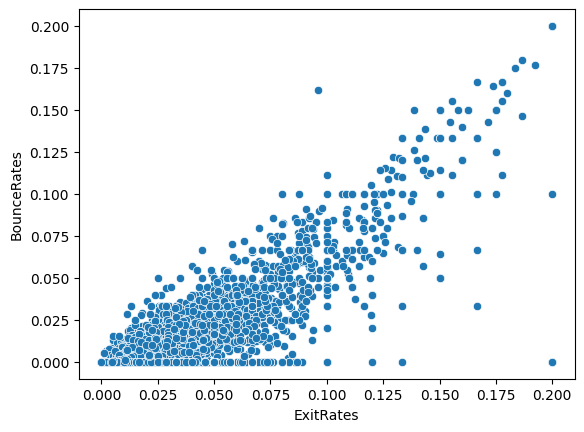

n:7376


In [34]:
brN_exN=df['BounceRates'].notna() & df['ExitRates'].notna() # Condicion de solo registros sin NaNs
dfb=df.loc[brN_exN,['ExitRates','BounceRates']]             # Se crea un dataframe para la regresion.
n=dfb.shape[0]                                              # Numero de registros se comprueba que tanto X como Y tienen la misma cantidad.
X=dfb['ExitRates']                                          # Variable Independiente
Y=dfb['BounceRates']                                        # Variable Dependiente
sns.scatterplot(x=X, y=Y)
plt.show()
print(f'n:{n}')

In [35]:
dfb.describe()

,ExitRates,BounceRates
count,7376.000000,7376.000000
mean,0.042131,0.021166
std,0.047098,0.046635
min,0.000000,0.000000
25%,0.014286,0.000000
50%,0.025000,0.003077
75%,0.050000,0.016667
max,0.200000,0.200000


Entonces se define la función de interpolación propuesta:
$$br=(a \cdot ex+b)^2+c$$
en adelante definida como:
$$Y=(a \cdot X+b)^2+c$$

In [36]:
def interpol(x,a,b,c):
    return (a*x+b)**2+c

En esta primera regresion se usa el Módulo ***Optimize*** de ***scipy*** con su metodo ***curve_fit*** que calcula los parámetros y la matriz de covarianzas. De esta última de su diagonal aplicando raiz cuadrada se obtienen los errores standard de los parámetros. Ya que curve_fit no calcula los errores standard de los parámetros directamente ni tampoco en el estimador de Y.

In [37]:
# Carga de modulo optimize y método curve_fit
from scipy.optimize import curve_fit

params, covariance = curve_fit(interpol,X,Y) # Ajusta con interpol a X-Y y devuelve los parametros y la matriz de covarianza
a,b,c=params                                    # "desempaquetado de params en a b c" son los parametros de la regresion.
print(f'Parámetros:\n a:{a} b:{b} c:{c}')
print('Matriz de covarianza: \n',covariance)

# Errores standard de los parámetros
errors = np.sqrt(np.diag(covariance))           #Raiz cuadrada de cada elemento de la diagonal de la matriz de covarianza
sa,sb,sc=errors                                  # desmpaquetado del resultado de la linea anterior
print(f'sa = ± {sa}, sb = ± {sb}, sc = ± {sc}')

Parámetros:
 a:2.24526010499841 b:-0.010548523598968195 c:0.002921548382030986
Matriz de covarianza: 
 [[ 1.61703768e-04 -2.96404596e-05  2.22672162e-06]
 [-2.96404596e-05  5.98824994e-06 -5.01474022e-07]
 [ 2.22672162e-06 -5.01474022e-07  7.11755140e-08]]
sa = ± 0.012716279631106584, sb = ± 0.0024470900956665128, sc = ± 0.0002667873947942255


Error en el estimador de BouceRates:
$$e_B=\sqrt{\frac{\hat{e}^T\hat{e}}{n - (k+1)}}=0.0135$$
en donde:  
$\hat{e}=Y-\hat{Y}$=valores de la muestra - valores de la predicción  
$n$ numero de registros o de la muestra  
$k$ numero de variables independientes (en este caso 1)

In [38]:
# Error esperado en el estimador de B
er = Y - interpol(X, a, b,c)
eb=np.sqrt(np.dot(er.T,er)/(n-2))

print(f'Error en el estimador de BounceRates: {eb}')
print(f'Errores en los parámetros a, b, c: {errors}')

Error en el estimador de BounceRates: 0.013531446986503522
Errores en los parámetros a, b, c: [0.01271628 0.00244709 0.00026679]


Coeficiente de determinación $R^2$ y coeficiente de correlación $R$:
$$R^2=1-\frac{(Y-\hat Y)^T(Y-\hat Y)}{(Y-\bar Y)^T(Y-\bar Y)}=1-\frac{\hat{e}^T\hat{e}}{\bar{e}^T\bar{e}}=0.9158$$
$$R=\sqrt{R^2}=0.957$$
en donde:
$\bar{e}=Y-\bar{Y}$=valores de la muestra - valor medio de Y  

In [39]:
# Variabilidad en B
em = Y - Y.mean()
r2=1-(np.dot(er.T,er)/np.dot(em.T,em))
r=np.sqrt(r2)

print(f'Coeficiente de Determinación: {r2}')
print(f'Coeficiente de Correlacion: {r}')

Coeficiente de Determinación: 0.9158208862313616
Coeficiente de Correlacion: 0.9569853113979135


Ahora se calcula el intervalo de confianza solo a modo de prueba no es necesario hay muchas formas y criterios de hacer esto.

In [40]:
# Intervalo de confianza del 95% para los parámetros
inter_Conf = 1.96 * errors  # 1.96 es el valor crítico para un intervalo de confianza del 95%
print(inter_Conf)

[0.02492391 0.0047963  0.0005229 ]


Se grafica todo.

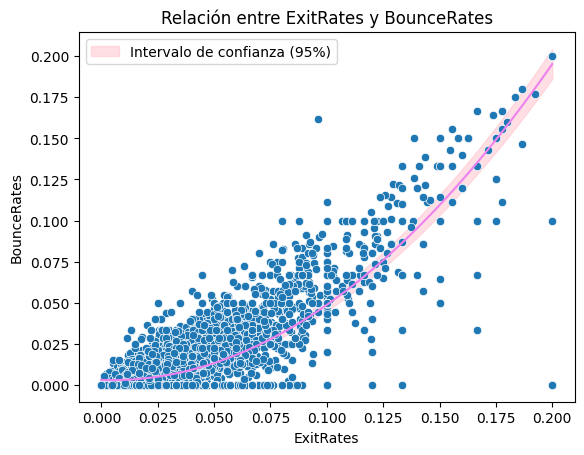

In [41]:
fig,ax=plt.subplots()
xi=np.linspace(0,0.2,100)


# Dibujar el intervalo de confianza alrededor del ajuste
lower_bound = interpol(xi, a - inter_Conf[0], b - inter_Conf[1],c - inter_Conf[2])
upper_bound = interpol(xi, a + inter_Conf[0], b + inter_Conf[1],c + inter_Conf[2])
plt.fill_between(xi, lower_bound, upper_bound, color='pink', alpha=0.5, label='Intervalo de confianza (95%)')

ax.plot(xi,interpol(xi,a,b,c),color='violet',)
sns.scatterplot(x=X,y=Y)
ax.set_title("Relación entre ExitRates y BounceRates")


plt.show()

Se hace una copia del dataframe principal original, y se reemplazan los NaNs de BouceRate con la funcion recién calculada:
$$BounceRates=(2.245*ExitRates-0.010548)^2+0.002921$$

In [42]:
dfbc=df.copy()
br_exN=dfbc['BounceRates'].isna()
dfbc.loc[br_exN,['BounceRates']]=interpol(dfbc[br_exN]['ExitRates'],a,b,c)
dfbc.isna().sum()

id                            0
Administrative                0
Administrative_Duration       0
Informational                 0
Informational_Duration        0
ProductRelated                0
ProductRelated_Duration       0
BounceRates                   0
ExitRates                   392
PageValues                    0
SpecialDay                    0
Month                         0
OperatingSystems           6877
Browser                       0
Region                       86
TrafficType                   0
VisitorType                 257
Weekend                       0
revenue                       0
dtype: int64

Ahora se hace lo mismo pero al reves, se calcula la regresion de Y=ExitRates y X=BounceRates. Se estaría tentado a utilizar simplemente la inversa pero no es buena idea ya que ahora la optimizacion de minimos cuadradas se hace en el otro eje y seguramente no dará el mismo resultado. Por tanto lo más conveniente es plantear como la función de interpolación la función inversa pero volverla a ajustar los parametros resultado, no darán igual que si se hubiera hecho la inversa de la funcion anterior. 
Entonces se propone la función inversa a la anterior para realizar el ajuste. En este caso se hace con el módulo lmfit y la clase model: (es otra de las opciones que encontré, parece ser un paquete mas completo que curve_fit)

$$ex=g(br)=\sqrt{(a \cdot br+b)}+c$$

Primero para el ajuste se invierten las variables, ahora ExitRates es la variable dependiente. Se usa el mismo dataframe que antes donde BounceRates y ExistRates no tiene NaNs ni valores interpolados (no se usan los BounceRates calculados a partir de la regresion anterior para no introducir sesgo).

In [43]:
Y=dfb['ExitRates']               # Variable Dependiente
X=dfb['BounceRates']             # Variable Independiente 
Y.shape[0]

7376

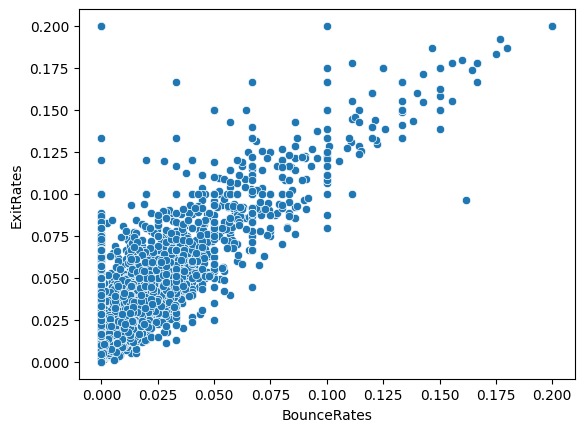

In [44]:
fig,ax=plt.subplots()
sns.scatterplot(x=X, y=Y)
plt.show()

In [45]:
def inter2(x,a2,b2,c2):
    return (a2*x+b2)**0.5+c2

In [46]:
# Carga de modulo lmfit y la clase Model
from lmfit import Model

# Crear un objeto Model
modelo = Model(inter2)

# Crear parámetros iniciales
params = modelo.make_params(a2=0.1, b2=0.0005, c2=0.001)

# Ajustar el modelo a los datos
res = modelo.fit(Y, params, x=X)

# Coeficientes de la regresion
a2,b2,c2=[res.params['a2'].value,res.params['b2'].value,res.params['c2'].value]
# Errores en los Coeficientes de la regresion
errors=np.array([res.params['a2'].stderr,res.params['b2'].stderr,res.params['c2'].stderr])
sa2,sb2,sc2=errors
print(f'a2 = {a2}, b2 = {b2}, c2 = {c2}')
print(f'sa2 = ± {sa2}, sb2 = ± {sb2}, sc2 = ± {sc2}')
print(f'R2 = {res.rsquared}  R = {np.sqrt(res.rsquared)}')
res


a2 = 0.7399491928738505, b2 = 0.10165612068850927, c2 = -0.29768629609412706
sa2 = ± 0.06202984296514644, sb2 = ± 0.021224217369780807, sc2 = ± 0.0331627232057568
R2 = 0.8305570874442287  R = 0.9113490480843378


In [47]:
# Intervalo de confianza del 95% para los parámetros
inter_Conf = 1.96 * errors  # 1.96 es el valor crítico para un intervalo de confianza del 95%

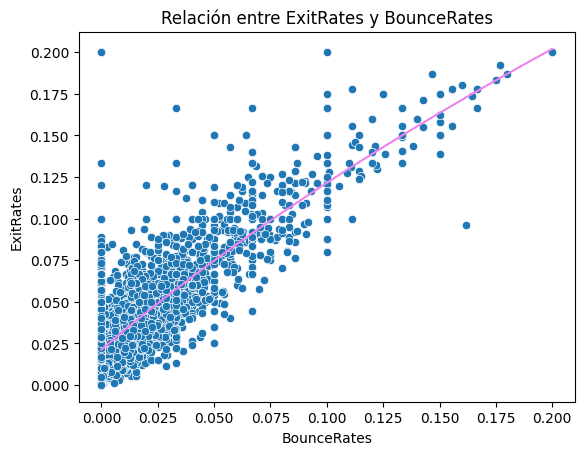

In [48]:
fig,ax=plt.subplots()
xi=np.linspace(0,0.2,100) # x entre 0 y 0.2 para plotear la función de interpolación.


# # Dibujar el intervalo de confianza alrededor del ajuste
# lower_bound = inter2(xi, a2 - inter_Conf[0], b2 - inter_Conf[1],c2 - inter_Conf[2])
# upper_bound = inter2(xi, a2 + inter_Conf[0], b2 + inter_Conf[1],c2 + inter_Conf[2])
# plt.fill_between(xi, lower_bound, upper_bound, color='pink', alpha=0.5, label='Intervalo de confianza (95%)')

ax.plot(xi,inter2(xi,a2,b2,c2),color='violet',)
sns.scatterplot(x=X,y=Y)
ax.set_title("Relación entre ExitRates y BounceRates")


plt.show()

Ahora se hace una copia del ultimo dataframe tratado, y se reemplazan los NaNs de ExitRates por los valores de la función de interpolación:
$$ExitRates=\sqrt{(0.740 \cdot BouceRates+0.102)}-0.298$$

In [49]:
dfex=dfbc.copy()
ex=dfex['ExitRates'].isna()
print(ex.sum())
dfex.loc[ex,['ExitRates']]=inter2(dfex[ex]['BounceRates'],a2,b2,c2)
dfex['ExitRates'].isna().sum()

392


0

In [50]:
dfex.isna().sum()

id                            0
Administrative                0
Administrative_Duration       0
Informational                 0
Informational_Duration        0
ProductRelated                0
ProductRelated_Duration       0
BounceRates                   0
ExitRates                     0
PageValues                    0
SpecialDay                    0
Month                         0
OperatingSystems           6877
Browser                       0
Region                       86
TrafficType                   0
VisitorType                 257
Weekend                       0
revenue                       0
dtype: int64

Para OperatingSystem, se elige reemplazar los NaNs con valores aleatorios de forma proporcional a la ocurrencia en el dataframe original. 

In [51]:
from IPython.display import display
# Primero se hace copia del df anterior
dfop=dfex.copy()

# Valores únicos en OperatingSystem
uniqueValues=dfop['OperatingSystems'].unique()
print(f'Valores Unicos de OperatingSystem: {uniqueValues}')

# Proporcion de ocurrencia en el dataframe
proportionsNaNs=dfop['OperatingSystems'].value_counts(normalize=True,dropna=False).to_frame('Frecuencias con NaNs')
proportions=dfop['OperatingSystems'].value_counts(normalize=True).to_frame('Frecuencias sin NaNs') 
display(proportionsNaNs) # to_frame en la linea anterior es solo para darle formato de dataframe.
display(proportions) # display es para mostrarlos a todos con la representacion de tabla como cuando no se utiliza el print.

# Se generan los valores que reemplazaran a los NaNs de forma proporcional.
n_NaNs=dfop['OperatingSystems'].isna().sum() # Cantidad de NaNs
print(f'Cantidad de NaNs: {n_NaNs}')

new_values = np.random.choice(proportions.index, size=n_NaNs, p=proportions['Frecuencias sin NaNs'].values)
print(f'Cantidad de Valores para el reemplazo: {new_values.shape[0]}')

# # Reemplazo NaNs con fillna No se pudo averiguar porque no reemplaza bien.
# display(dfop['OperatingSystems'].isna().sum())
# dfop['OperatingSystems']=dfop['OperatingSystems'].fillna(pd.Series(new_values)) # se utiliza pd.Series porque fillna acepta series o dict o value escalar.
# display(dfop['OperatingSystems'].isna().sum())

# Se reemplazan los NaNs de forma proporcional con los new_values.
display(dfop['OperatingSystems'].isna().sum())
cond=dfop['OperatingSystems'].isna()
dfop.loc[cond,'OperatingSystems']=pd.Series(new_values).values # se utiliza pd.Series porque fillna acepta series o dict o value escalar.
display(dfop['OperatingSystems'].isna().sum())

# Se verifica que la proporcion del nuevo df sea similar a la original y sin NaNs
display(dfop['OperatingSystems'].value_counts(normalize=True,dropna=False).to_frame('Frecuencias con NaNs'))


Valores Unicos de OperatingSystem: [nan  3.  2.  1.  4.  8.  7.]


,Frecuencias con NaNs
OperatingSystems,
NaN,0.800489
2.0,0.105808
3.0,0.042719
1.0,0.041439
4.0,0.008148
8.0,0.001280
7.0,0.000116


,Frecuencias sin NaNs
OperatingSystems,
2.0,0.530338
3.0,0.214119
1.0,0.207701
4.0,0.040840
8.0,0.006418
7.0,0.000583


Cantidad de NaNs: 6877
Cantidad de Valores para el reemplazo: 6877


6877

0

,Frecuencias con NaNs
OperatingSystems,
2.0,0.526481
3.0,0.220347
1.0,0.202770
4.0,0.043068
8.0,0.006518
7.0,0.000815


Para VisitorType y Region sus NaNs no superan a lo sumo 4% asi que se eliminan.

In [52]:
visitorRegion=dfop['VisitorType'].isna() | dfop['Region'].isna()
n_visitorRegion=dfop[visitorRegion].shape[0]
print(f'Registros a eliminar:',n_visitorRegion)
print(f'Porcentaje a eliminar: {np.round(n_visitorRegion*100/dfop.shape[0],2)} %',)


Registros a eliminar: 340
Porcentaje a eliminar: 3.96 %


In [53]:
display(dfop.isna().sum())
display(dfop.shape[0])

dfop=dfop.dropna(subset=['VisitorType'])
dfop=dfop.dropna(subset=['Region'])

display(dfop.shape[0])
display(dfop.isna().sum())

id                           0
Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems             0
Browser                      0
Region                      86
TrafficType                  0
VisitorType                257
Weekend                      0
revenue                      0
dtype: int64

8591

8251

id                         0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
revenue                    0
dtype: int64

Se exporta a csv

In [54]:
dfop.ExitRates.describe()

count    8251.000000
mean        0.042420
std         0.047457
min         0.000000
25%         0.014667
50%         0.025000
75%         0.048947
max         0.201960
Name: ExitRates, dtype: float64

In [57]:
# dfop.to_csv('onlineShopperFix.csv')